## Image Compression using Principal Component Analysis

Principal Component Analysis (PCA) is a data preparation technique that uses linear algebra for dimensionality reduction. PCA determines important features of a dataset and improves the performance of a machine learning model without sacrificing accuracy.

I will use PCA for image compression since images are just a grid of pixel values.

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import cv2

**Loading the Image**

It is critical to scale the dataset before applying PCA because PCA is sensitive to the relative ranges of features. I will divide the image data by 255 and then split the image into three channels.

In [2]:
def read_img_color(filepath):
    read_image = plt.imread(filepath)/255
    red_channel_image, green_channel_image, blue_channel_image = cv2.split(read_image)
    return read_image, red_channel_image, green_channel_image, blue_channel_image

In [3]:
original,red,green,blue = read_img_color('./dog_Labrador.jpg')

In [4]:
original.shape

(6000, 3742, 3)

The image has 6000x3742 pixels with three arrays corresponding to the RGB channel.

**Displaying the image**

The original image in color and the corresponding channel images in grayscale are displayed.

In [5]:
def display_img(read_image, red_channel_image, green_channel_image, blue_channel_image):
    fig = plt.figure(figsize=(5,7)) 
    fig.add_subplot(221)
    plt.title("Original Image")
    plt.imshow(read_image)
    fig.add_subplot(222)
    plt.title("Red Channel")
    plt.imshow(red_channel_image,cmap='gray')
    fig.add_subplot(223)
    plt.title("Green Channel")
    plt.imshow(green_channel_image,cmap='gray')
    fig.add_subplot(224)
    plt.title("Blue Channel")
    plt.imshow(blue_channel_image,cmap='gray')
    plt.show()

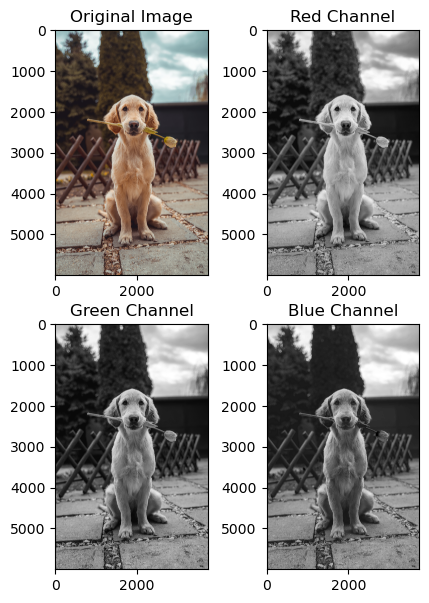

In [6]:
display_img(original,red,green,blue)

**Fit and Transform the data in PCA**

We are now ready to compress the image! I will apply PCA to each channel and merge the three arrays to get the compressed image data.

In [7]:
def pca_transform(k,img):
    pca = PCA(n_components=k)
    pca_img = pca.fit_transform(img)
    return pca.inverse_transform(pca_img)

In [8]:
def scaler_transform(img):
    scaler = MinMaxScaler(clip=True)
    return scaler.fit_transform(img)

In [9]:
def image_pca(k,red_channel_image,green_channel_image,blue_channel_image):
    
    transformed_red = (scaler_transform(pca_transform(k,red_channel_image))*255).astype(np.uint8)
    
    transformed_green = (scaler_transform(pca_transform(k,green_channel_image))*255).astype(np.uint8)
    
    transformed_blue = (scaler_transform(pca_transform(k,blue_channel_image))*255).astype(np.uint8)
    
    img_reduced= cv2.merge((transformed_red, transformed_green, transformed_blue))    
    
    return img_reduced

**Image Reconstruction**

Now I will reconstruct the original image using projections of the data while increasing the number of principal components.
<br>
Note that I'm not reverting to the original data. I'm simply going back to the actual dimension of the original image for visualization.

In [10]:
pca_size_array = [10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

In [11]:
def display_pca_images(pca_array):
    if len(pca_array)%4==0:
        num_rows = len(pca_array)//4
    else:
        num_rows = (len(pca_array)//4)+1
    fig = plt.figure(figsize=(12,4*num_rows))
    for i in range(len(pca_array)):
        fig.add_subplot(num_rows, 4, i+1)
        plt.imshow(image_pca(pca_array[i],red,green,blue))
        plt.title(f'Components: {pca_array[i]}')
    plt.show()

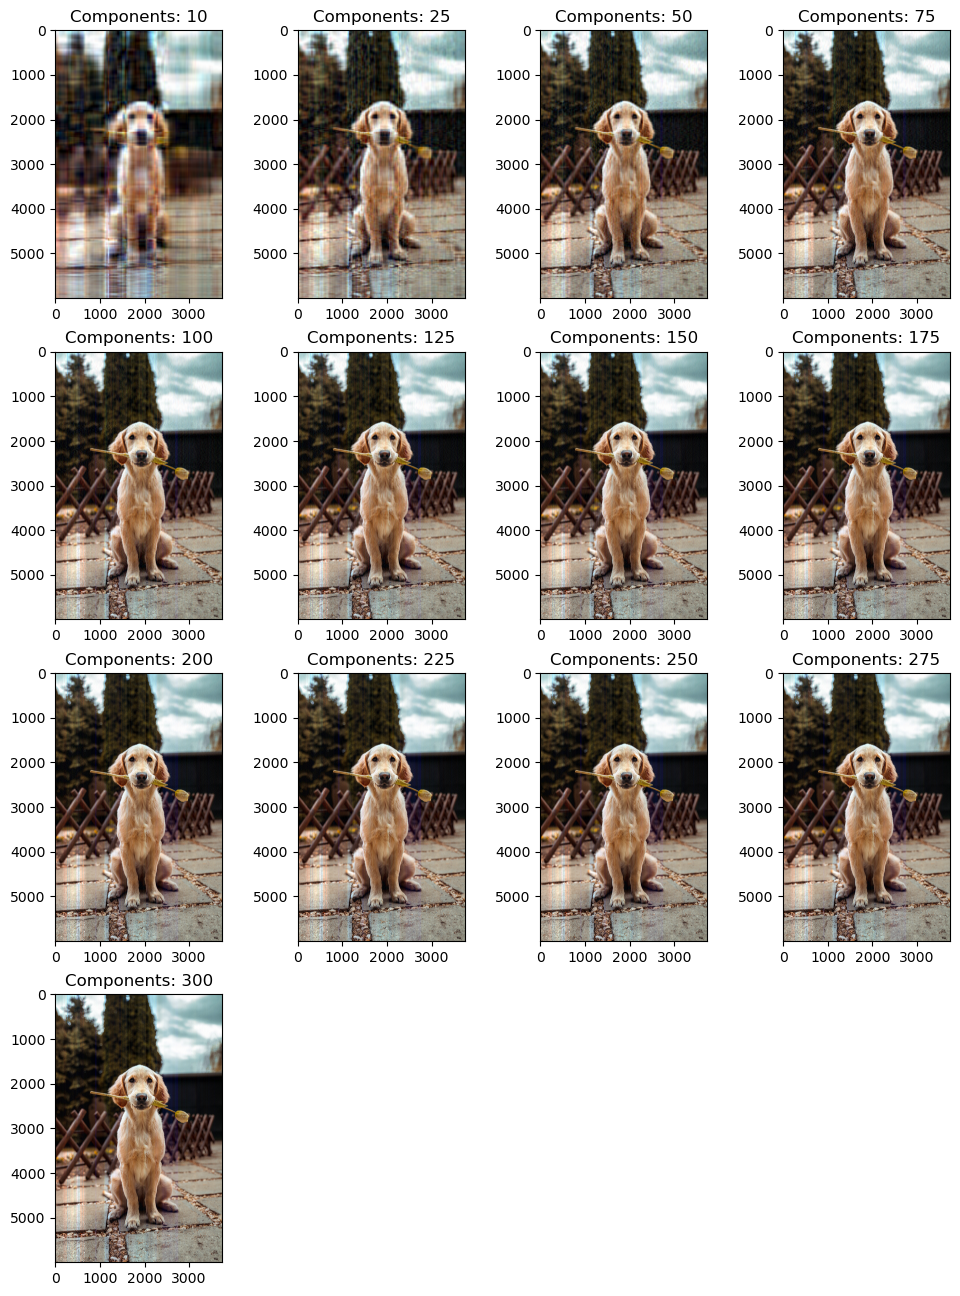

In [12]:
display_pca_images(pca_size_array)

In [15]:
def explained_variance_by_components(img,percentage):
    fig = plt.figure(figsize=[10,5])
    pca = PCA()
    pca.fit(img)
    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
    k = np.argmax(var_cumu>percentage)
    print(f'Number of components explaining {percentage}% variance: {k}')
    plt.title(f'Cumulative Explained Variance explained by the components')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=percentage, color="r", linestyle="--")
    plt.plot(var_cumu)
    plt.show()

Number of components explaining 99% variance: 94


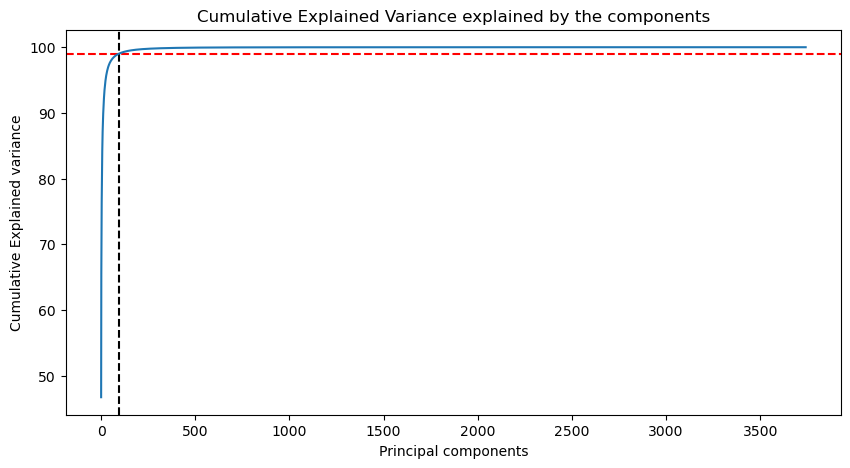

In [16]:
explained_variance_by_components(red,99)

Number of components explaining 99% variance: 93


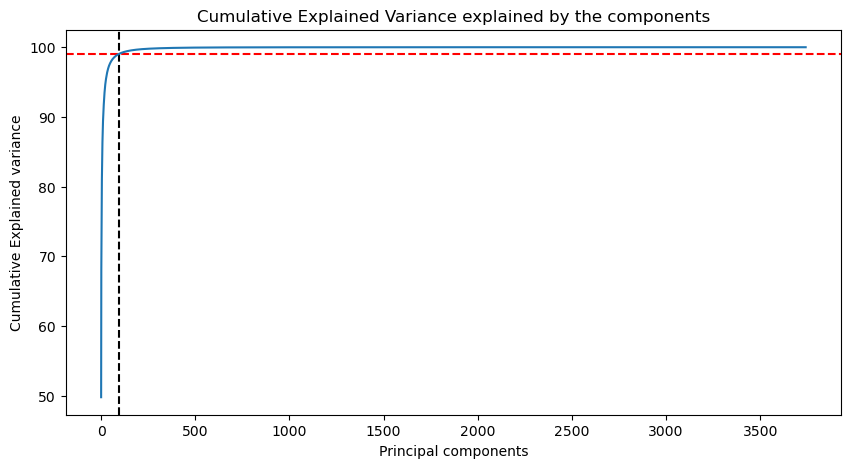

In [17]:
explained_variance_by_components(green,99)

Number of components explaining 99% variance: 89


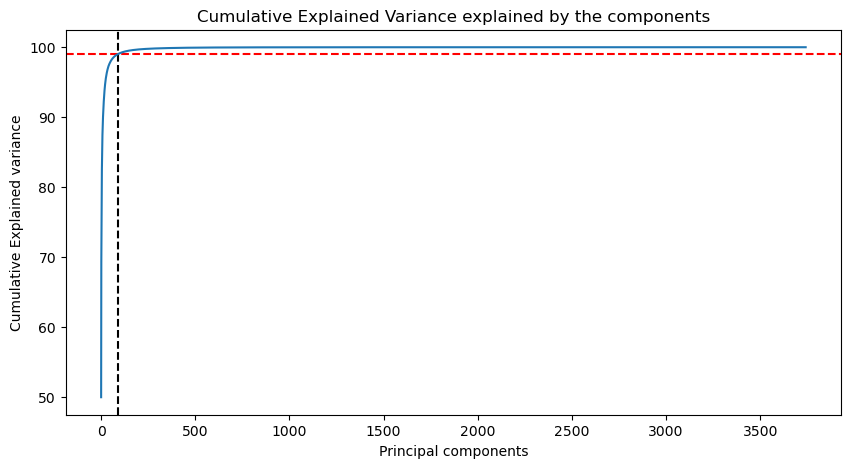

In [18]:
explained_variance_by_components(blue,99)

**Conclusion**

As the number of principal components increases, the reconstruction becomes more representative of the original image. 

There is a drastic improvement in quality while increasing the number of principal components since more variance gets captured. The first few principal components affect the quality the most, while any additional principal components after 100 hardly make any difference.

We can ignore all the components after 100, as we’ll lose only a little information as it captures a very small amount of variance in the data.